# Coffee Shop Sales

## About the Project
### To analyze the transaction records and provide insights to the business

 ## Features Description
      *transcation_id: Unique identifier for each transaction
      *transcation_date: Date of the transaction
      *transcation_time: time the transaction took place
      *transcation_qty: unit sold for each transaction
      *store_id: unique identifier for each store
      *store_location: location of the store in NYC
      *product_id: unique identifier for each product
      *unit price: price of each unit of product
      *product_category: category that the product belongs to
      *product_type: type of product sold
      *product_detail: a detail of the product

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_column', None)
import os
import warnings
warnings.filterwarnings('ignore')



## Import the dataset

In [4]:
df = pd.read_excel(r"D:\java\coffee shop sales data.xlsx")


## Data Wrangling

In [7]:
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,Size,Total_bill,Month Name,Day Name,Hour,Day of Week,Month
0,114301,2023-06-01,11:33:29,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Thursday,11,4,6
1,115405,2023-06-02,11:18:24,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,11,5,6
2,115478,2023-06-02,12:02:45,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,12,5,6
3,116288,2023-06-02,19:39:47,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,19,5,6
4,116714,2023-06-03,12:24:57,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Saturday,12,6,6


In [9]:
#check for the shape of the table
df.shape

(149116, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   store_id          149116 non-null  int64         
 4   store_location    149116 non-null  object        
 5   product_id        149116 non-null  int64         
 6   transaction_qty   149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Size              149116 non-null  object        
 12  Total_bill        149116 non-null  float64       
 13  Month Name        149116 non-null  object        
 14  Day 

In [13]:
#check for the missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
product_category    0
product_type        0
product_detail      0
Size                0
Total_bill          0
Month Name          0
Day Name            0
Hour                0
Day of Week         0
Month               0
dtype: int64

In [15]:
#check for the duplicates
df.duplicated().sum()

0

In [17]:
#check for the datatypes
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
store_id                     int64
store_location              object
product_id                   int64
transaction_qty              int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
Size                        object
Total_bill                 float64
Month Name                  object
Day Name                    object
Hour                         int64
Day of Week                  int64
Month                        int64
dtype: object

In [19]:
#check for summary statistics
numeric_col = df.select_dtypes(include='number')
numeric_col.describe()

,transaction_id,store_id,product_id,transaction_qty,unit_price,Total_bill,Hour,Day of Week,Month
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.00000,149116.000000
mean,74737.371872,5.342063,47.918607,1.438276,3.382219,4.686367,11.735790,2.99202,3.988881
std,43153.600016,2.074241,17.930020,0.542509,2.658723,4.227099,3.764662,1.99028,1.673091
min,1.000000,3.000000,1.000000,1.000000,0.800000,0.800000,6.000000,0.00000,1.000000
25%,37335.750000,3.000000,33.000000,1.000000,2.500000,3.000000,9.000000,1.00000,3.000000
50%,74727.500000,5.000000,47.000000,1.000000,3.000000,3.750000,11.000000,3.00000,4.000000
75%,112094.250000,8.000000,60.000000,2.000000,3.750000,6.000000,15.000000,5.00000,5.000000
max,149456.000000,8.000000,87.000000,8.000000,45.000000,360.000000,20.000000,6.00000,6.000000


# Feature Engineering

In [22]:
#make a copy of the data
data = df.copy()

In [24]:
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,Size,Total_bill,Month Name,Day Name,Hour,Day of Week,Month
0,114301,2023-06-01,11:33:29,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Thursday,11,4,6
1,115405,2023-06-02,11:18:24,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,11,5,6
2,115478,2023-06-02,12:02:45,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,12,5,6
3,116288,2023-06-02,19:39:47,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,19,5,6
4,116714,2023-06-03,12:24:57,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Saturday,12,6,6


In [26]:
'''creating a column "transaction_timestamp" by combining transaction_date and transaction_time'''
data['transaction_timestamp'] = data['transaction_date'].astype(str) + ' ' + data['transaction_time'].astype(str)


In [28]:
#converting the transaction_timestap to datetime datatype
data['transaction_timestamp'] = pd.to_datetime(data['transaction_timestamp'], errors='coerce')


In [30]:
#confirm that the column has been created
data.dtypes

transaction_id                    int64
transaction_date         datetime64[ns]
transaction_time                 object
store_id                          int64
store_location                   object
product_id                        int64
transaction_qty                   int64
unit_price                      float64
product_category                 object
product_type                     object
product_detail                   object
Size                             object
Total_bill                      float64
Month Name                       object
Day Name                         object
Hour                              int64
Day of Week                       int64
Month                             int64
transaction_timestamp    datetime64[ns]
dtype: object

In [32]:

#create a new column transaction_month and transaction_monthname


In [34]:
#create a new column transaction_month
data['transaction_month'] = data['transaction_date'].dt.month 

In [36]:
#create a new column transaction_monthname
data['transaction_monthname'] = data['transaction_date'].dt.month_name() 

In [38]:

#create a new column transaction_day and transaction_dayname



In [40]:
#create a new column transaction_day
data['day_of_week'] =  data['transaction_date'].dt.day_of_week  

In [42]:
#create a new column transaction_dayname
data['day'] = data['transaction_date'].dt.day_name()

In [44]:
#create a new column transaction_hour
data['transaction_hour'] = data['transaction_timestamp'].dt.hour

In [46]:
#create a new column revenue (transaction_qty * price)
data['revenue'] = data['transaction_qty'] * data['unit_price']

In [48]:
#confirm the new columns by viewing a sample of the table
data.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,product_category,product_type,product_detail,Size,Total_bill,Month Name,Day Name,Hour,Day of Week,Month,transaction_timestamp,transaction_month,transaction_monthname,day_of_week,day,transaction_hour,revenue
0,114301,2023-06-01,11:33:29,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Thursday,11,4,6,2023-06-01 11:33:29,6,June,3,Thursday,11,3.0
1,115405,2023-06-02,11:18:24,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,11,5,6,2023-06-02 11:18:24,6,June,4,Friday,11,3.0
2,115478,2023-06-02,12:02:45,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,12,5,6,2023-06-02 12:02:45,6,June,4,Friday,12,3.0
3,116288,2023-06-02,19:39:47,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Friday,19,5,6,2023-06-02 19:39:47,6,June,4,Friday,19,3.0
4,116714,2023-06-03,12:24:57,3,Astoria,45,1,3.0,Tea,Brewed herbal tea,Peppermint,Large,3.0,June,Saturday,12,6,6,2023-06-03 12:24:57,6,June,5,Saturday,12,3.0


# Data Exploration

In [52]:
#check earliest transaction date
data['transaction_timestamp'].min()

Timestamp('2023-01-01 07:06:11')

In [54]:
#check the latest transaction date
data['transaction_timestamp'].max()

Timestamp('2023-06-30 20:57:19')

In [56]:
#check the unique transaction hours
data['transaction_hour'].value_counts().sort_index(ascending=True)

transaction_hour
6      4594
7     13428
8     17654
9     17764
10    18545
11     9766
12     8708
13     8714
14     8933
15     8979
16     9093
17     8745
18     7498
19     6092
20      603
Name: count, dtype: int64

In [58]:
#check the unique transaction quantities
data['transaction_qty'].value_counts()

transaction_qty
1    87159
2    58642
3     3279
4       23
8       10
6        3
Name: count, dtype: int64

In [60]:

#checking the number of stores and their locations


In [62]:
#checking the number of stores
data['store_id'].nunique()

3

In [64]:
#checking their locations
data['store_location'].unique()

array(['Astoria', 'Lower Manhattan', "Hell's Kitchen"], dtype=object)

In [66]:
#checking the number of unique product categories
data['product_category'].nunique()

9

In [68]:
data['product_category'].unique()

array(['Tea', 'Coffee', 'Bakery', 'Drinking Chocolate', 'Flavours',
       'Loose Tea', 'Packaged Chocolate', 'Branded', 'Coffee beans'],
      dtype=object)

In [70]:
#checking the number of products
data['product_type'].nunique()

29

# Data Analysis

## Calculating KPI's

### Total Orders

In [75]:
#calculate total orders
total_orders = data['transaction_id'].count()
total_orders

149116

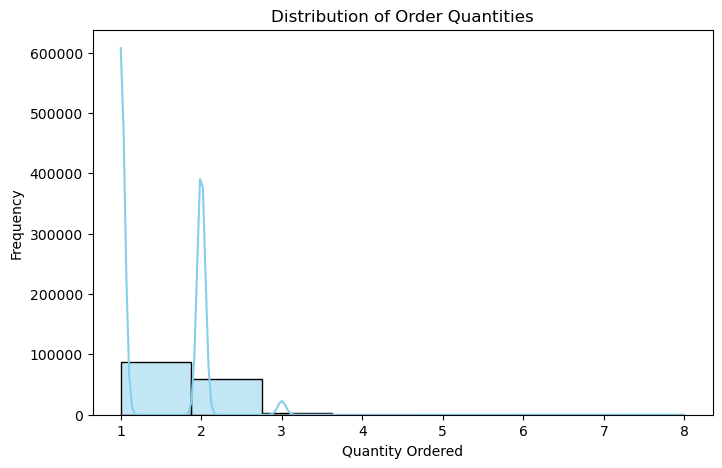

In [55]:
# Histogram for Order Quantities
plt.figure(figsize=(8, 5))
sns.histplot(data['transaction_qty'], bins=8, kde=True, color='skyblue')
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()


### Total Sales

In [78]:
#calculate total sales
total_sales = data['transaction_qty'].sum()
total_sales

214470

### No of Working Days

In [81]:
#calculate total days
no_of_days = (data['transaction_date'].max()-data['transaction_date'].min()).days
no_of_days


180

### Average Order per day

In [84]:
#calculate average orders per day
avg_orders_per_day = total_orders/no_of_days
avg_orders_per_day

828.4222222222222

### Total Revenue

In [87]:
#calculate the total revenue
total_revenue = data['revenue'].sum()
total_revenue

698812.3300000002

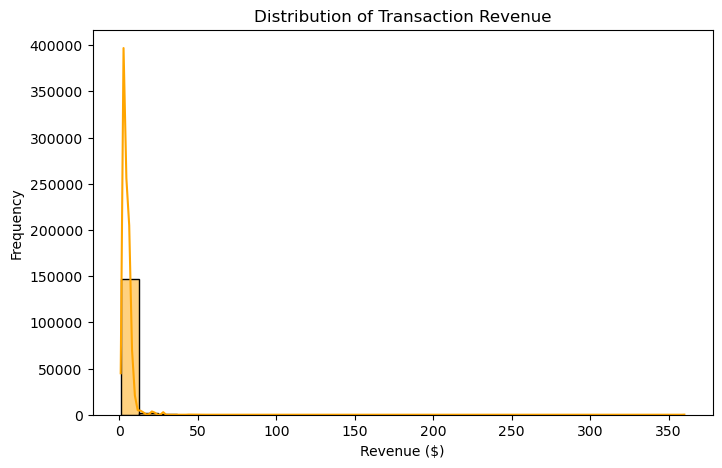

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(data['revenue'], bins=30, kde=True, color='orange')
plt.title('Distribution of Transaction Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.show()


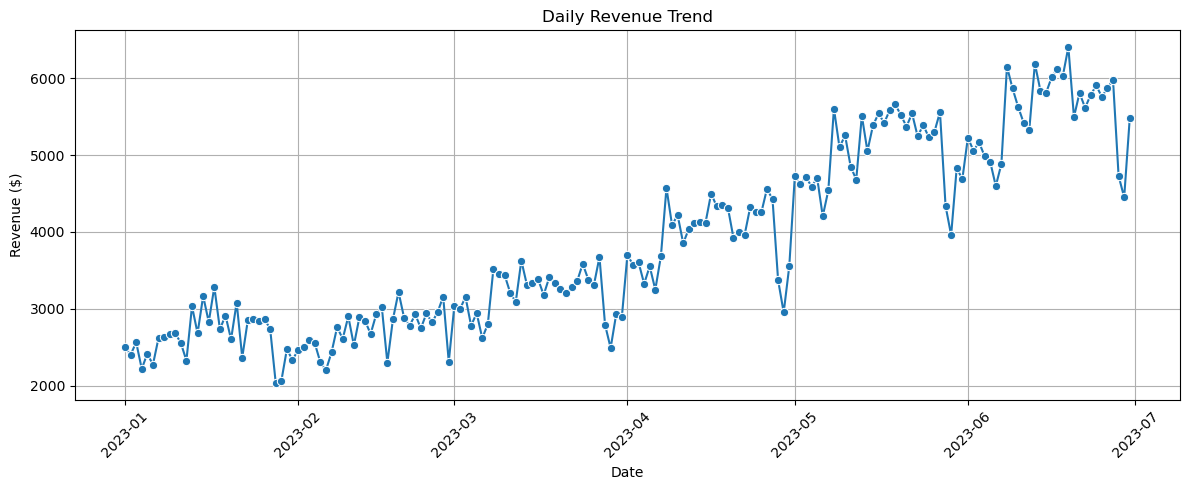

In [52]:
# Revenue per day
daily_revenue = data.groupby('transaction_date').agg(total_revenue=('revenue', 'sum')).reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_revenue, x='transaction_date', y='total_revenue', marker='o')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Average Order Value(AOV)

In [90]:
#calculate average order value
aov = total_revenue/total_orders
aov

4.686367190643527

## Order Analysis

### Hourly Orders

In [94]:
#find the total orders by transaction hours
hourly_orders = data.groupby(['transaction_hour'], as_index=False).agg(total_orders=('transaction_id', 'count'))
hourly_orders


,transaction_hour,total_orders
0,6,4594
1,7,13428
2,8,17654
3,9,17764
4,10,18545
5,11,9766
6,12,8708
7,13,8714
8,14,8933
9,15,8979


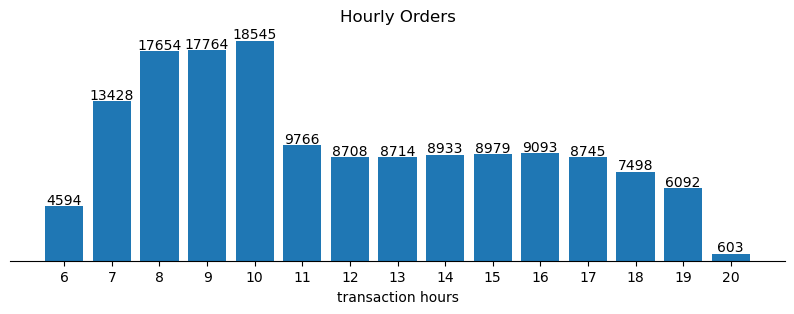

In [146]:
#plot a chart of the hourly orders
fig, ax = plt.subplots(figsize=[10,3])
ax.bar(x=hourly_orders['transaction_hour'].astype('str'), height=hourly_orders['total_orders'])

#add title
ax.set_title('Hourly Orders')

#add x-axis label
ax.set_xlabel('transaction hours')

#remove spines
ax.spines[['top','right','left']].set_visible(False)

#remove y-axis
ax.yaxis.set_visible(False)

#add data label
for index, values in enumerate(hourly_orders['total_orders']):
    ax.annotate(values, xy=(index, values+500), ha='center', va='center')

plt.show()

### Orders by Day of Week

In [133]:
#calculate orders by days of week
day_orders = data.groupby(['day_of_week', 'day'], as_index=False).agg(total_orders=('transaction_id', 'count'))
day_orders

,day_of_week,day,total_orders
0,0,Monday,21643
1,1,Tuesday,21202
2,2,Wednesday,21310
3,3,Thursday,21654
4,4,Friday,21701
5,5,Saturday,20510
6,6,Sunday,21096


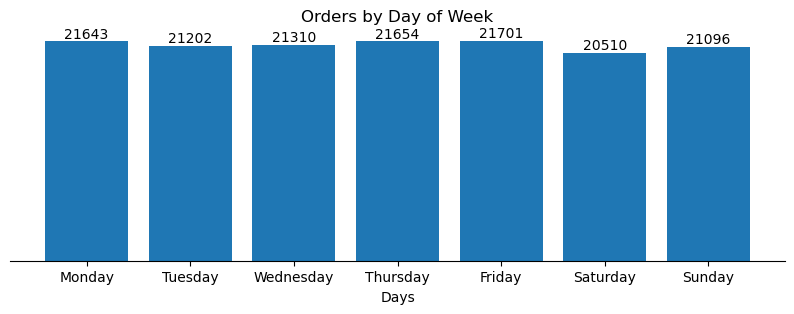

In [148]:
#plot a bar chart of the order by day of week
fig, ax = plt.subplots(figsize=[10, 3])
ax.bar(x=day_orders['day'].astype('str'), height=day_orders['total_orders'])

# Adding title
ax.set_title('Orders by Day of Week')

# Adding x-axis label
ax.set_xlabel('Days')

# Removing unnecessary spines
ax.spines[['top', 'right', 'left']].set_visible(False)

# Removing the y-axis for a cleaner look
ax.yaxis.set_visible(False)

# Adding data labels above each bar
for index, values in enumerate(day_orders['total_orders']):
    ax.annotate(values, xy=(index, values + 700), ha='center', va='center')

# Displaying the plot
plt.show()



### Orders by Day of Week and Hour

In [158]:
#plot a heat map of the orders by day of week and transaction hour
day_hour_orders = data.pivot_table(
    index = 'day_of_week',
    columns = 'transaction_hour',
    values='transaction_id',
    aggfunc = 'count')
day_hour_orders


transaction_hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
day_of_week,,,,,,,,,,,,,,,
0,661,1992,2482,2494,2612,1478,1308,1267,1376,1319,1355,1302,1077,846,74
1,489,1846,2783,2753,2846,1301,1126,1152,1224,1254,1227,1232,957,872,140
2,698,1873,2540,2527,2596,1468,1226,1311,1257,1270,1272,1235,1118,836,83
3,731,1959,2389,2375,2570,1470,1307,1317,1341,1323,1406,1311,1125,970,60
4,707,1989,2544,2707,2761,1405,1231,1199,1265,1295,1257,1226,1149,886,80
5,592,1877,2438,2345,2551,1307,1279,1187,1226,1287,1287,1178,1019,846,91
6,716,1892,2478,2563,2609,1337,1231,1281,1244,1231,1289,1261,1053,836,75


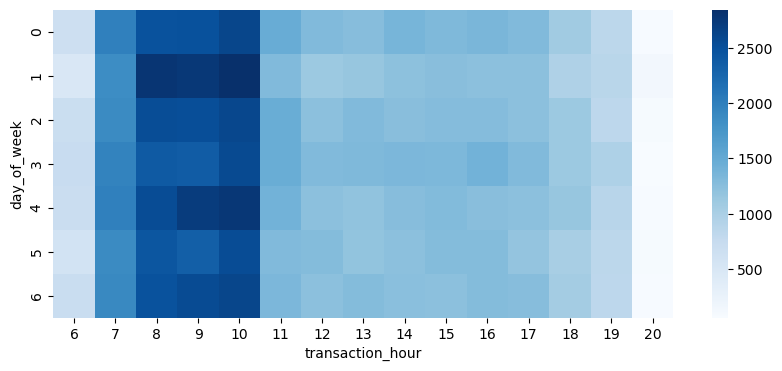

In [160]:
#plotting a heat map
fig, ax = plt.subplots(figsize=[10,4])

sns.heatmap(day_hour_orders,cmap='Blues')
plt.show()

### Monthly orders

In [178]:
#calculate the orders by month
monthly_orders = data.groupby(['transaction_month', 'transaction_monthname'], as_index=False).agg(
    total_orders=('transaction_id', 'count'))
monthly_orders

,transaction_month,transaction_monthname,total_orders
0,1,January,17314
1,2,February,16359
2,3,March,21229
3,4,April,25335
4,5,May,33527
5,6,June,35352


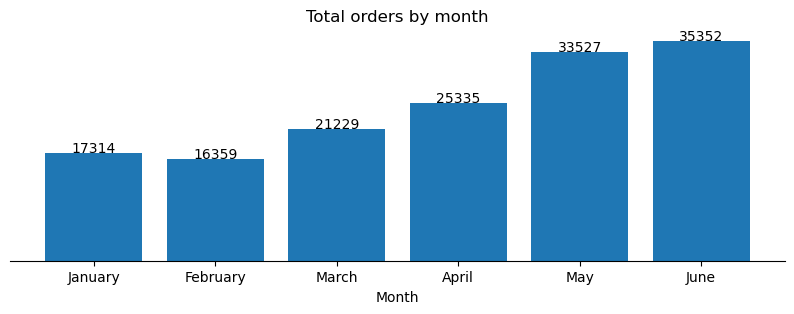

In [167]:
#plot a bar chart for monthly orders
fig, ax = plt.subplots(figsize=[10, 3])
ax.bar(x=monthly_orders['transaction_monthname'].astype('str'), height=monthly_orders['total_orders'])

# Adding title
ax.set_title('Total orders by month')

# Adding x-axis label
ax.set_xlabel('Month')

# Removing unnecessary spines
ax.spines[['top', 'right', 'left']].set_visible(False)

# Removing the y-axis for a cleaner look
ax.yaxis.set_visible(False)

# Adding data labels above each bar
for index, values in enumerate(monthly_orders['total_orders']):
    ax.annotate(values, xy=(index, values + 700), ha='center', va='center')

# Displaying the plot
plt.show()



### Orders by Store

In [176]:
#calculate the orders by stores
store_orders = data.groupby(['store_id', 'store_location'], as_index=False).agg(
    total_orders = ('transaction_id', 'count')).sort_values('total_orders', ascending=False)
store_orders

,store_id,store_location,total_orders
2,8,Hell's Kitchen,50735
0,3,Astoria,50599
1,5,Lower Manhattan,47782


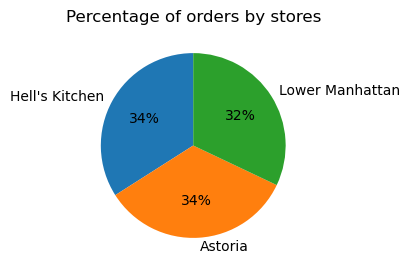

In [182]:
#plot a pie chart of orders by stores
fig, ax = plt.subplots(figsize=[5,3])

ax.pie(store_orders['total_orders'], autopct='%.0f%%', startangle=90,labels=store_orders['store_location'])
 #add title
ax.set_title('Percentage of orders by stores')
plt.show()

### Orders by Product Category

In [187]:
#calculate the orders by product category
data.groupby(['product_category'], as_index=False).agg(
    total_orders=('transaction_id', 'count')).sort_values('total_orders', ascending=False)

,product_category,total_orders
2,Coffee,58416
8,Tea,45449
0,Bakery,22796
4,Drinking Chocolate,11468
5,Flavours,6790
3,Coffee beans,1753
6,Loose Tea,1210
1,Branded,747
7,Packaged Chocolate,487


### Top 10 products by orders

In [192]:
#calculate the top 10 products by orders
data.groupby(['product_type'], as_index=False).agg(
    total_orders=('transaction_id', 'count')).sort_values('total_orders', ascending=False).head(10)

,product_type,total_orders
4,Brewed Chai tea,17183
13,Gourmet brewed coffee,16912
0,Barista Espresso,16403
17,Hot chocolate,11468
3,Brewed Black tea,11350
6,Brewed herbal tea,11245
27,Scone,10173
22,Organic brewed coffee,8489
10,Drip coffee,8477
25,Premium brewed coffee,8135


### Revenue Analysis

In [197]:
#calculate revenue by months
data.groupby(['transaction_month', 'transaction_monthname'], as_index=False).agg(
    total_revenue=('revenue', 'sum'))

,transaction_month,transaction_monthname,total_revenue
0,1,January,81677.74
1,2,February,76145.19
2,3,March,98834.68
3,4,April,118941.08
4,5,May,156727.76
5,6,June,166485.88


### Revenue by Product Category

In [202]:
#calculate revenue by product category
data.groupby(['product_category'], as_index=False).agg(
    total_revenue=('revenue', 'sum')).sort_values('total_revenue', ascending=False)

,product_category,total_revenue
2,Coffee,269952.45
8,Tea,196405.95
0,Bakery,82315.64
4,Drinking Chocolate,72416.00
3,Coffee beans,40085.25
1,Branded,13607.00
6,Loose Tea,11213.60
5,Flavours,8408.80
7,Packaged Chocolate,4407.64


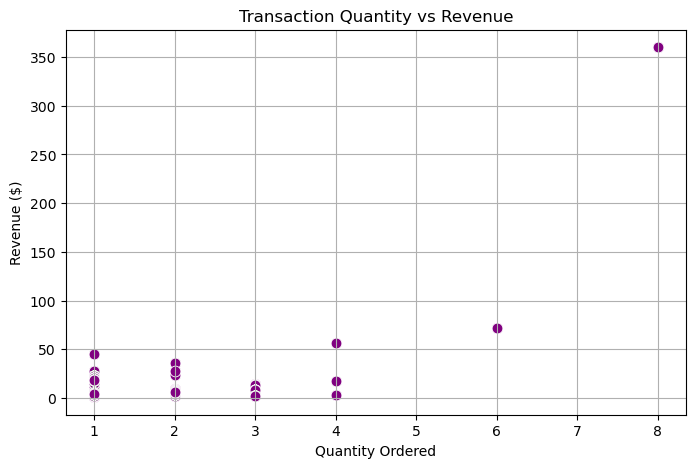

In [57]:
# Scatter plot: Transaction Quantity vs Revenue
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='transaction_qty', y='revenue', color='purple', s=60)

# Adding titles and labels
plt.title('Transaction Quantity vs Revenue')
plt.xlabel('Quantity Ordered')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()


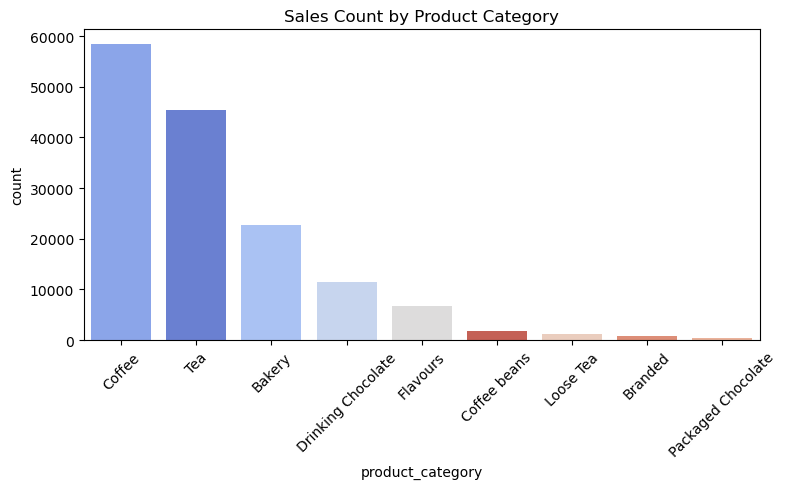

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='product_category', order=df['product_category'].value_counts().index, palette='coolwarm', hue='product_category')
plt.title('Sales Count by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
coffee_total_bill = df[df['product_category'] == 'Coffee']['Total_bill']
overall_mean = df['Total_bill'].mean()

t_stat, p_value = stats.ttest_1samp(coffee_total_bill, overall_mean)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject Null Hypothesis: Coffee Total Bill is significantly different from overall average.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference.")

T-Statistic: -7.859635295086425
P-Value: 3.917979261189281e-15
Reject Null Hypothesis: Coffee Total Bill is significantly different from overall average.
